In [1]:
from language_helper.rnn.data import Processing
from language_helper.rnn.model import RNN, LSTM
from language_helper.rnn.predict import PredictRNN, PredictLSTM
from language_helper.rnn.encode import EncodeUtility
from language_helper.rnn.train import TrainingRNN, TrainingLSTM
from torch.nn import CrossEntropyLoss

/Users/mynguyen/Repos/language-helper/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

In [2]:
# Loading Data
processor = Processing(data_domain="qa", delimiter="\t")
dataframe = processor.load()
processor.prepare(dataframe, "question")

print(f"Size of Vocab: {len(processor.vocabulary_mapping)}")
print(f"Size of Dataset: {len(processor.list_of_tokens)}")

[nltk_data] Downloading package punkt to /Users/mynguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading...<_io.TextIOWrapper name='./dataset/qa/S09_question_answer_pairs.txt' mode='r' encoding='UTF-8'>
825 rows and 6 columns appended
Loading...<_io.TextIOWrapper name='./dataset/qa/S08_question_answer_pairs.txt' mode='r' encoding='UTF-8'>
1715 rows and 6 columns appended
Completed: 2540 rows and 6 columns loaded
Columns Index(['ArticleTitle', 'Question', 'Answer', 'DifficultyFromQuestioner',
       'DifficultyFromAnswerer', 'ArticleFile'],
      dtype='object')
Size of Vocab: 3467
Size of Dataset: 1626


## Vanilla RNN

In [3]:
# start training
model = RNN(input_size = len(processor.vocabulary_mapping), 
            hidden_size=128,
            output_size=len(processor.vocabulary_mapping))

# trainer
trainer = TrainingRNN(model=model, \
                    criterion=CrossEntropyLoss(), \
                    training_set=processor.list_of_tokens, \
                    encode = EncodeUtility(vocabulary_mapping= processor.vocabulary_mapping), \
                    n_iterations=1000, \
                    learning_rate=0.001)

In [ ]:
processor.vocabulary_mapping

/Users/mynguyen/Repos/language-helper/language_helper/rnn/train.py:145: UserWarning: This overload of sub_ is deprecated:
	sub_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	sub_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1420.)
  p.data.sub_(-self.learning_rate, p.grad.data)


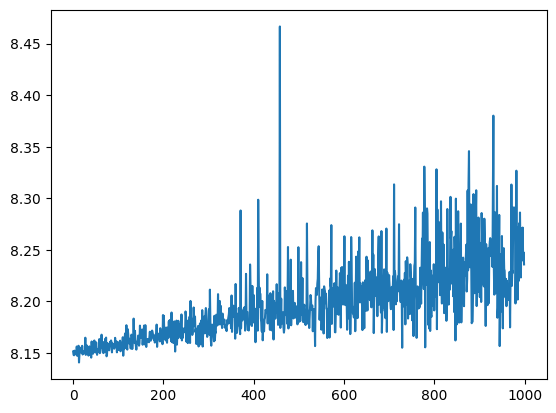

In [4]:
trainer.run()
trainer.plot()

In [5]:
# Predict

input = "is"
predicted_string = PredictRNN.predict(input_sentence=input, 
                        rnn=model, 
                        encode=EncodeUtility(vocabulary_mapping=processor.vocabulary_mapping), 
                        hidden_size=128, 
                        vocabulary_mapping=processor.vocabulary_mapping, output_length=4)
print(f"Resulted String: {' '.join([input] + predicted_string)}")

Resulted String: is phenomenon sang drop classical got


In [6]:
# save model checkpoint
trainer.save_checkpoint()

## LSTM

In [7]:
lstm = LSTM(input_size = len(processor.vocabulary_mapping), 
            hidden_size=128,
            layer_size=2,
            output_size=len(processor.vocabulary_mapping))
            
trainer_lstm = TrainingLSTM(model=lstm, \
                criterion=CrossEntropyLoss(), \
                training_set=processor.list_of_tokens, \
                encode = EncodeUtility(vocabulary_mapping= processor.vocabulary_mapping), \
                n_iterations=1000, \
                learning_rate=0.001)

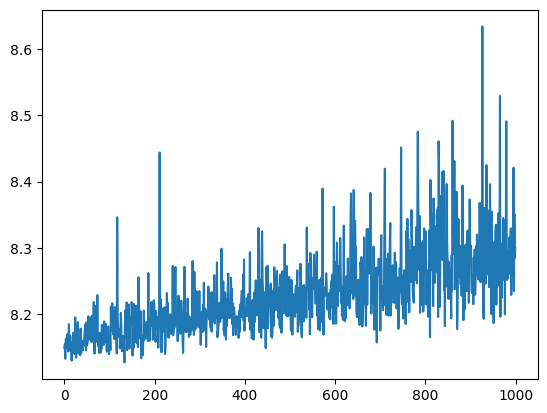

In [8]:
trainer_lstm.run()
trainer_lstm.plot()

In [10]:
input = "what"
predicted_string = PredictLSTM.predict(input_sentence=input, 
                        rnn=lstm, 
                        encode=EncodeUtility(vocabulary_mapping=processor.vocabulary_mapping), 
                        hidden_size=128, 
                        vocabulary_mapping=processor.vocabulary_mapping, output_length=4)
print(f"Resulted String: {' '.join([input] + predicted_string)}")

Resulted String: what bite true true true true
